In [1]:
!pwd

/Users/evanli/Documents/EvanPys/Progress/Pancreas_result


In [2]:
import os
import numpy as np
import pandas as pd

os.listdir()

['Beta',
 'Delta',
 'Pre-endocrine',
 '.DS_Store',
 'Ngn3 low EP',
 'Ductal',
 'Epsilon',
 'Ngn3 high EP',
 'lambda_loss_plot.png',
 'lambda_loss.ipynb',
 'Alpha',
 'alpha a=1e-3']

In [3]:
types = ['beta', 'delta', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'ductal', 'epsilon', 'alpha']
types = sorted([w.capitalize() for w in types])
types

['Alpha',
 'Beta',
 'Delta',
 'Ductal',
 'Epsilon',
 'Ngn3 high ep',
 'Ngn3 low ep',
 'Pre-endocrine']

In [10]:
# read tuning results from json
import json

loss_dict = {}
opt_lambda_dict = {}
prevalence_dict = {}
for celltype in types:
    with open(f'./{celltype}/{celltype}_tuning.json', 'r') as f:
        data = json.load(f)
        loss_dict[celltype] = data['loss_history']
        prevalence_dict[celltype] = data['Prevalence']
        print(celltype, 'loss done.')
    
    with open(f'./{celltype}/{celltype}_description.txt', 'r') as f:
        data = f.readlines()
        opt_lambda_dict[celltype] = float(data[0].split(':')[1].strip())
        print(celltype, 'lambda done.')
    



Alpha loss done.
Alpha lambda done.
Beta loss done.
Beta lambda done.
Delta loss done.
Delta lambda done.
Ductal loss done.
Ductal lambda done.
Epsilon loss done.
Epsilon lambda done.
Ngn3 high ep loss done.
Ngn3 high ep lambda done.
Ngn3 low ep loss done.
Ngn3 low ep lambda done.
Pre-endocrine loss done.
Pre-endocrine lambda done.


In [12]:
for celltype in types:
    print(celltype, len(loss_dict[celltype]))
print('=====')
for celltype in types:
    print(celltype, opt_lambda_dict[celltype])
print('=====')
for celltype in types:
    print(celltype, len(prevalence_dict[celltype]))

Alpha 25
Beta 25
Delta 25
Ductal 25
Epsilon 25
Ngn3 high ep 25
Ngn3 low ep 25
Pre-endocrine 25
=====
Alpha 0.0006812920690579617
Beta 0.0014677992676220707
Delta 0.0004641588833612784
Ductal 0.0010000000000000002
Epsilon 0.0006812920690579617
Ngn3 high ep 0.0010000000000000002
Ngn3 low ep 0.0006812920690579617
Pre-endocrine 0.0014677992676220707
=====
Alpha 25
Beta 25
Delta 25
Ductal 25
Epsilon 25
Ngn3 high ep 25
Ngn3 low ep 25
Pre-endocrine 25


In [6]:
log_lmbd_range = np.linspace(np.log(1e-4), np.log(1), 25)
lmbd_range = np.exp(log_lmbd_range)
print(lmbd_range)

[1.00000000e-04 1.46779927e-04 2.15443469e-04 3.16227766e-04
 4.64158883e-04 6.81292069e-04 1.00000000e-03 1.46779927e-03
 2.15443469e-03 3.16227766e-03 4.64158883e-03 6.81292069e-03
 1.00000000e-02 1.46779927e-02 2.15443469e-02 3.16227766e-02
 4.64158883e-02 6.81292069e-02 1.00000000e-01 1.46779927e-01
 2.15443469e-01 3.16227766e-01 4.64158883e-01 6.81292069e-01
 1.00000000e+00]


In [7]:
# create color palette for 8 cell types
import seaborn as sns

keys = list(loss_dict.keys())
palette = sns.color_palette('husl', n_colors=len(keys))
color_dict = dict(zip(keys, palette))

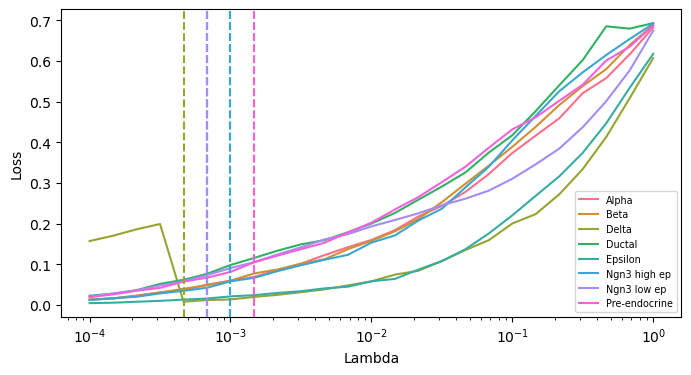

In [30]:
# Plot the loss history against lambda
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# plot the y-axis values for each key in loss_dict
for key in loss_dict:
    ax.plot(lmbd_range, loss_dict[key], label=key, color=color_dict[key])

# add vertical dotted lines at the values in opt_lambda_dict
for key in opt_lambda_dict:
    ax.axvline(x=opt_lambda_dict[key], linestyle='--', color=color_dict[key])

# set the x-axis label
ax.set_xlabel('Lambda')
ax.set_xscale('log')

# set the y-axis label
ax.set_ylabel('Loss')

# add a legend
ax.legend(loc='lower right', fontsize='x-small')

# show the plot
plt.show()

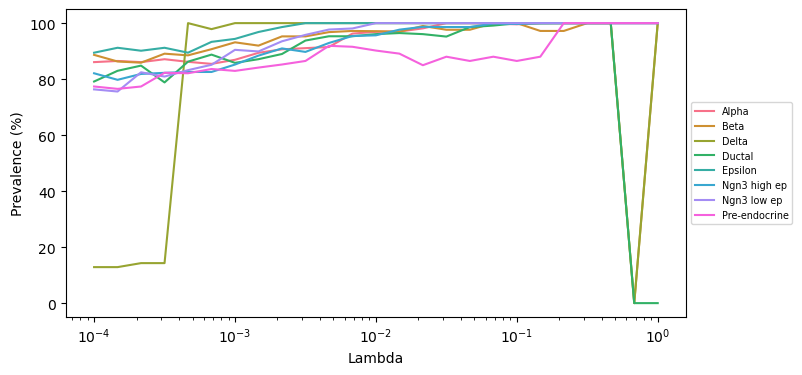

In [20]:
# Plot the prevalence against lambda
fig, ax = plt.subplots(figsize=(8, 4))
for key in prevalence_dict:
    ax.plot(lmbd_range, [100*p for p in prevalence_dict[key]], label=key, color=color_dict[key])

ax.set_xlabel('Lambda')
ax.set_xscale('log')
ax.set_ylabel('Prevalence (%)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')
plt.show()